## COVID-19 Impact on Community Mobility - Analysis based on Google dataset
----
@prithivida

#### I have taken ONLY a handful countires which are either touted as a model for fighting COVID-19 or the ones which are heavily impacted.

## Plot COVID-19 Cases

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd

#### Note: You need this ONLY if you want a continent wise plot

In [18]:
cn2continent = pd.read_csv("countries2continents.csv").fillna('')
cn2continent = cn2continent[['name', 'region']]
cn2continent.set_index('name',inplace=True)
cn2continent = cn2continent.to_dict()['region']

In [19]:
covid_cases = pd.read_csv("time_series_covid19_confirmed_global.csv").fillna('')
covid_cases = covid_cases[covid_cases['Country/Region'].isin(['Germany','US','United Kingdom', 'Spain', 'Italy', 'China', 'India','Taiwan*', 'Korea, South'])]
covid_cases['continent'] = covid_cases.apply(lambda row : cn2continent.get(row['Country/Region']), axis=1, result_type="expand")

In [54]:
covid_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,continent
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,Asia
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,593,593,593,593,593,593,593,593,593,Asia
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,579,579,Asia
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,355,355,355,355,355,355,356,356,356,Asia
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,Asia


In [67]:
covid_cases_ts = pd.melt(covid_cases, id_vars=["Country/Region",  "continent", "Lat", "Long"], var_name="Date", value_name="Value")
covid_cases_ts = covid_cases_ts[~(covid_cases_ts['Value'].str.isnumeric() == False)]
covid_cases_ts = covid_cases_ts[['Country/Region', 'continent', 'Date', 'Value']]
covid_cases_ts['Date'] = pd.to_datetime(covid_cases_ts['Date'])
covid_cases_ts = covid_cases_ts[covid_cases_ts['Date'] <= '2020-04-30']

In [70]:
covid_cases_ts.sample(5)

,Country/Region,continent,Date,Value
864,United Kingdom,None,2020-02-06,0
1162,United Kingdom,None,2020-02-12,0
4224,United Kingdom,None,2020-04-12,129
4445,China,Asia,2020-04-17,168
3526,China,Asia,2020-03-30,146


In [71]:
covid_cases_ts['month'] = covid_cases_ts['Date'].dt.month
covid_cases_ts = covid_cases_ts.groupby(['Country/Region', 'month'])['Value'].agg('sum').reset_index()

[Text(0.5, 1.0, 'Humdata.org: # of COVID-19 confirmed cases')]

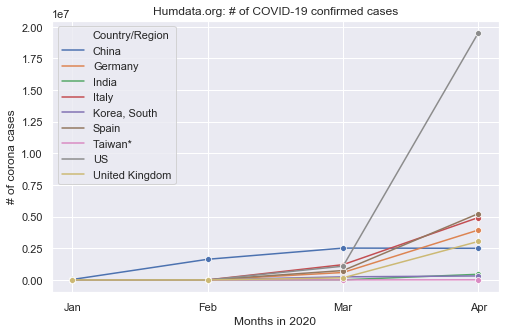

In [74]:
sns.set(rc={'figure.figsize':(8,5)})
plt.xticks([1,2,3,4,5], ["Jan", "Feb", "Mar","Apr","May"])
ax = sns.lineplot(data=covid_cases_ts, x = 'month', marker="o", y='Value', hue='Country/Region')
ax.set(xlabel='Months in 2020', ylabel='# of corona cases')
ax.set(title='Humdata.org: # of COVID-19 confirmed cases')

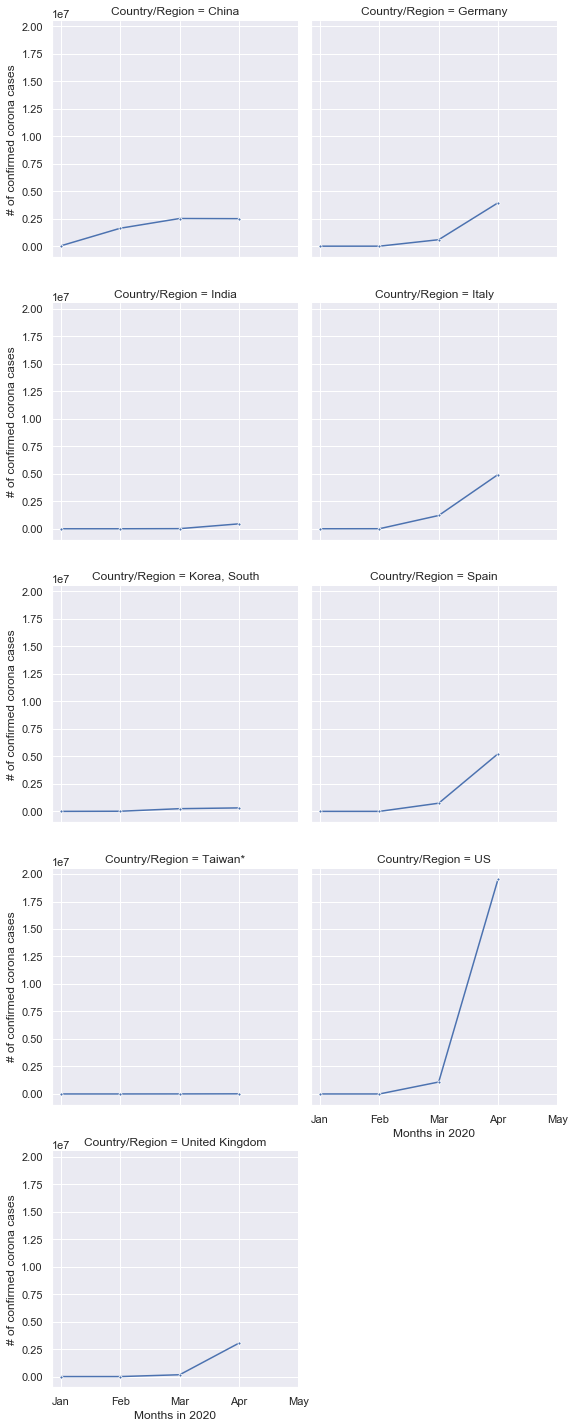

In [75]:
g = sns.FacetGrid(covid_cases_ts, col="Country/Region", col_wrap=2, height=4, size=4, aspect=1)
g = g.map(sns.lineplot, "month", "Value", marker=".")
g.set(xticklabels=["Jan", "Feb", "Mar","Apr","May"])
g.set(xticks=[1,2,3,4,5])
g.set(xlabel='Months in 2020', ylabel='# of confirmed corona cases')

## Plot Goolge Mobility Trends

#### Note: You need this ONLY if you want a continent wise plot

In [33]:
country2continent = pd.read_csv("countries2continents.csv").fillna('')
country2continent = country2continent[['alpha-2', 'region']]
country2continent.set_index('alpha-2',inplace=True)
country2continent = country2continent.to_dict()['region']

In [35]:
google_mob = pd.read_csv("Global_Mobility_Report.csv").fillna('0')
google_mob = google_mob[google_mob['country_region'].isin(['Germany','United States', 'United Kingdom',' Spain', 'Italy', 'China', 'India','Taiwan', 'South Korea'])]
google_mob['continent'] = google_mob.apply(lambda row : country2continent.get(row['country_region_code']), axis=1, result_type="expand")
google_mob.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,continent
17534,DE,Germany,0,0,2020-02-15,6,1,45,10,0,-1,Europe
17535,DE,Germany,0,0,2020-02-16,7,10,9,6,-1,0,Europe
17536,DE,Germany,0,0,2020-02-17,2,2,7,1,-2,0,Europe
17537,DE,Germany,0,0,2020-02-18,2,2,10,1,-1,1,Europe
17538,DE,Germany,0,0,2020-02-19,3,0,6,-1,-1,1,Europe


In [36]:
cols = google_mob.columns
for col in cols:
    if 'baseline' in col:
        google_mob[col] = google_mob[col].astype('float')
        
google_mob['date'] = pd.to_datetime(google_mob['date'])

In [37]:
google_mob['mobility_requests'] = google_mob.apply(lambda x:  x['retail_and_recreation_percent_change_from_baseline'] + 
                                                      x['grocery_and_pharmacy_percent_change_from_baseline'] +
                                                      x['parks_percent_change_from_baseline'] + 
                                                      x['transit_stations_percent_change_from_baseline'] +
                                                      x['workplaces_percent_change_from_baseline']  +
                                                      x['residential_percent_change_from_baseline'], axis=1)
google_mob['mobility_requests'] = google_mob['mobility_requests']
google_mob.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,continent,mobility_requests
17534,DE,Germany,0,0,2020-02-15,6.0,1.0,45.0,10.0,0.0,-1.0,Europe,61.0
17535,DE,Germany,0,0,2020-02-16,7.0,10.0,9.0,6.0,-1.0,0.0,Europe,31.0
17536,DE,Germany,0,0,2020-02-17,2.0,2.0,7.0,1.0,-2.0,0.0,Europe,10.0
17537,DE,Germany,0,0,2020-02-18,2.0,2.0,10.0,1.0,-1.0,1.0,Europe,15.0
17538,DE,Germany,0,0,2020-02-19,3.0,0.0,6.0,-1.0,-1.0,1.0,Europe,8.0


In [38]:
google_mob = google_mob[['country_region', 'date', 'mobility_requests']]
google_mob['month'] = google_mob['date'].dt.month

In [39]:
google_mob.head()

,country_region,date,mobility_requests,month
17534,Germany,2020-02-15,61.0,2
17535,Germany,2020-02-16,31.0,2
17536,Germany,2020-02-17,10.0,2
17537,Germany,2020-02-18,15.0,2
17538,Germany,2020-02-19,8.0,2


In [40]:
google_mob = google_mob.groupby(['country_region', 'month'])['mobility_requests'].agg('mean').reset_index()

[Text(0.5, 1.0, 'Google Maps: Monthly change in  % of mobility requests since COVID-19')]

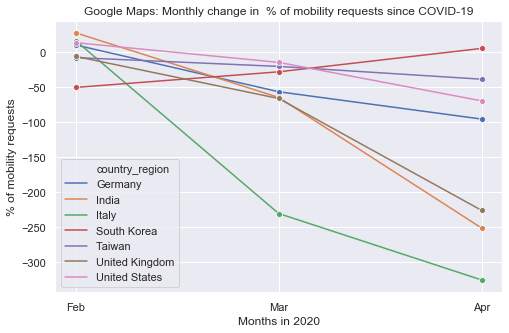

In [50]:
sns.set(rc={'figure.figsize':(8,5)})
plt.xticks([1,2,3,4,5], ["Jan", "Feb", "Mar","Apr","May"])
ax = sns.lineplot(data=google_mob, x='month', marker="o", y='mobility_requests', hue='country_region')
ax.set(xlabel='Months in 2020', ylabel='% of mobility requests')
ax.set(title='Google Maps: Monthly change in  % of mobility requests since COVID-19')

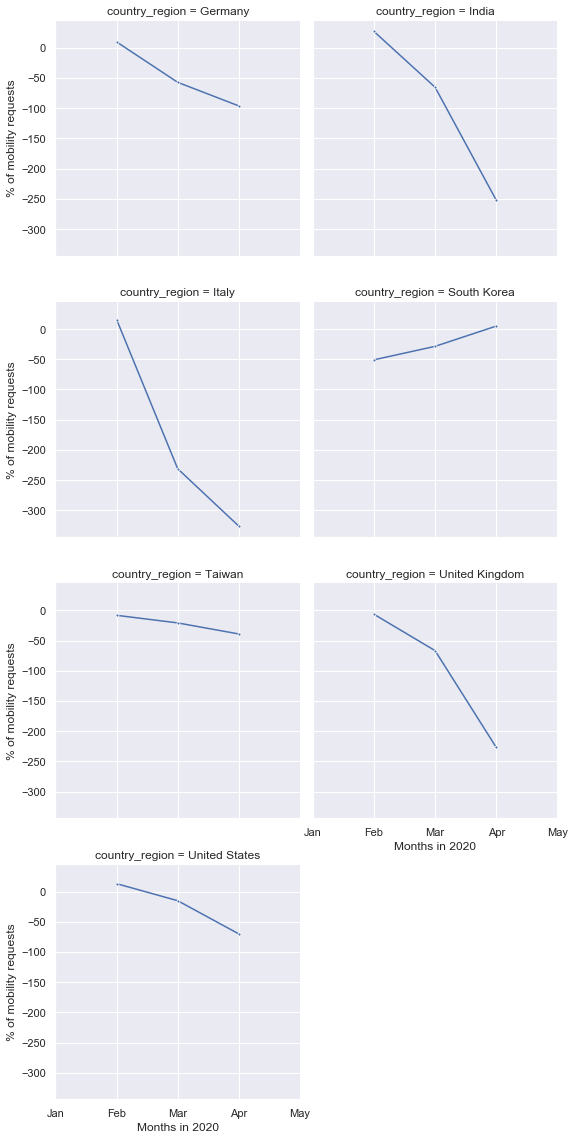

In [49]:
g = sns.FacetGrid(google_mob, col="country_region", col_wrap=2, height=4, size=4, aspect=1)
g = g.map(sns.lineplot, "month", "mobility_requests", marker=".")
g.set(xticklabels=["Jan", "Feb", "Mar","Apr","May"])
g.set(xticks=[1,2,3,4,5])
g.set(xlabel='Months in 2020', ylabel='% of mobility requests')